In [24]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [25]:
#imporing the dataset
dataset = pd.read_csv('data.csv')

In [26]:
#check the first 5 rows of the dataset
dataset.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


plot the 2 columns

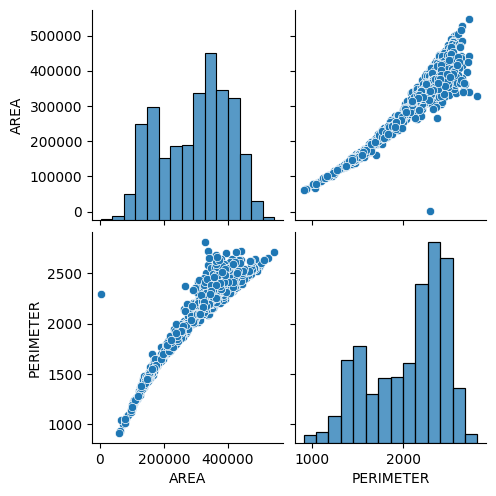

In [27]:
#plot the 2 columns
sns.pairplot(dataset[['AREA', 'PERIMETER']])
plt.show()

PLot scatter plot for perimeter and area for first 10 rows

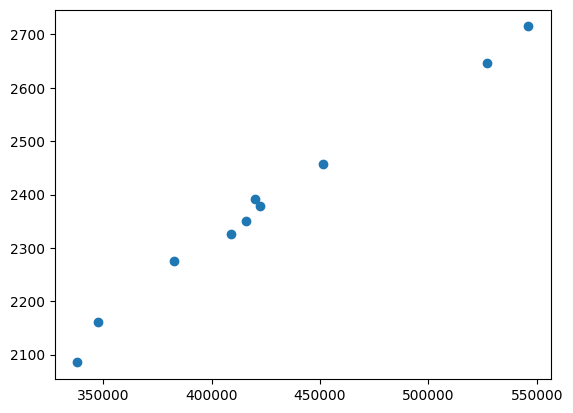

In [28]:

plt.scatter(dataset['AREA'][:10], dataset['PERIMETER'][:10])

In [29]:
#split the dataset into dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [30]:
#split the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#train model on random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
#predict the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['SAFAVI' 'SAFAVI']
 ['IRAQI' 'BERHI']
 ['IRAQI' 'IRAQI']
 ['BERHI' 'BERHI']
 ['DOKOL' 'DOKOL']
 ['ROTANA' 'ROTANA']
 ['ROTANA' 'ROTANA']
 ['ROTANA' 'ROTANA']
 ['SAFAVI' 'SAFAVI']
 ['DOKOL' 'DOKOL']
 ['ROTANA' 'IRAQI']
 ['DOKOL' 'DOKOL']
 ['ROTANA' 'ROTANA']
 ['DOKOL' 'DOKOL']
 ['ROTANA' 'SOGAY']
 ['SOGAY' 'SOGAY']
 ['DEGLET' 'DOKOL']
 ['SOGAY' 'SOGAY']
 ['SAFAVI' 'SAFAVI']
 ['SAFAVI' 'SAFAVI']
 ['BERHI' 'BERHI']
 ['SAFAVI' 'SAFAVI']
 ['DOKOL' 'DOKOL']
 ['DOKOL' 'DOKOL']
 ['DOKOL' 'DOKOL']
 ['SAFAVI' 'SOGAY']
 ['SAFAVI' 'SAFAVI']
 ['SAFAVI' 'SAFAVI']
 ['IRAQI' 'IRAQI']
 ['DEGLET' 'DOKOL']
 ['SAFAVI' 'SAFAVI']
 ['IRAQI' 'IRAQI']
 ['SAFAVI' 'SAFAVI']
 ['ROTANA' 'ROTANA']
 ['SAFAVI' 'SAFAVI']
 ['DEGLET' 'DOKOL']
 ['ROTANA' 'ROTANA']
 ['SAFAVI' 'SAFAVI']
 ['SOGAY' 'SOGAY']
 ['IRAQI' 'IRAQI']
 ['SAFAVI' 'SAFAVI']
 ['SAFAVI' 'SAFAVI']
 ['SOGAY' 'SOGAY']
 ['ROTANA' 'ROTANA']
 ['BERHI' 'BERHI']
 ['DEGLET' 'DEGLET']
 ['ROTANA' 'ROTANA']
 ['ROTANA' 'ROTANA']
 ['SAFAVI' 'SAFAVI']
 ['DEGLET' 'DEG

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 9  0  0  2  1  0  0]
 [ 0 11  2  0  0  1  1]
 [ 0  5 38  0  0  0  0]
 [ 2  0  0 13  1  0  0]
 [ 1  0  0  0 25  0  1]
 [ 0  0  0  0  0 44  0]
 [ 0  5  0  0  1  2 15]]


0.8611111111111112

plot the confusion matrix

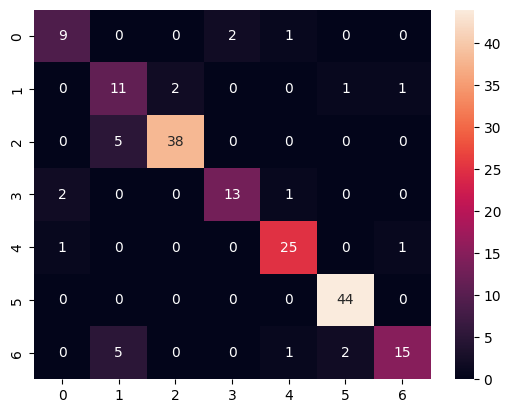

In [35]:

sns.heatmap(cm, annot=True)
plt.show()

In [37]:
#check f1 score recall and precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       BERHI       0.75      0.75      0.75        12
      DEGLET       0.52      0.73      0.61        15
       DOKOL       0.95      0.88      0.92        43
       IRAQI       0.87      0.81      0.84        16
      ROTANA       0.89      0.93      0.91        27
      SAFAVI       0.94      1.00      0.97        44
       SOGAY       0.88      0.65      0.75        23

    accuracy                           0.86       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.87      0.86      0.86       180



plot f1 score recall and precision on line graph

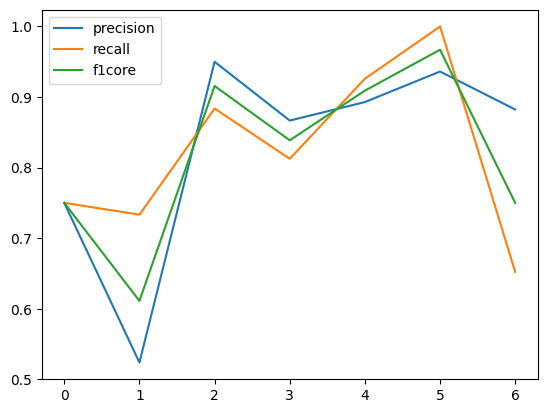

In [39]:

from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
plt.plot(precision, label='precision')
plt.plot(recall, label='recall')
plt.plot(fscore, label='f1core')
plt.legend()
plt.show()

In [43]:
#test the model on dataset
y_pred = classifier.predict(X)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y.reshape(len(y),1)),1))



[['BERHI' 'BERHI']
 ['BERHI' 'BERHI']
 ['BERHI' 'BERHI']
 ...
 ['SOGAY' 'SOGAY']
 ['SOGAY' 'SOGAY']
 ['SOGAY' 'SOGAY']]


plot test results

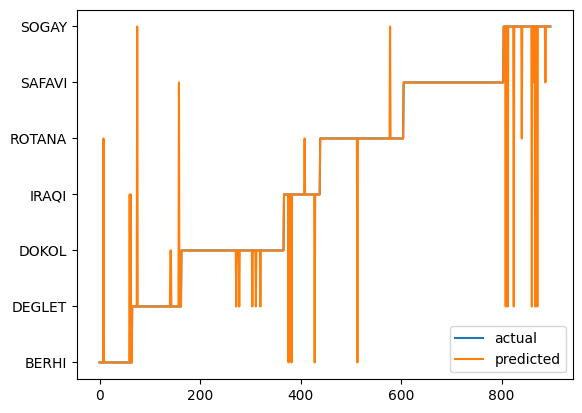

In [45]:
plt.plot(y, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()


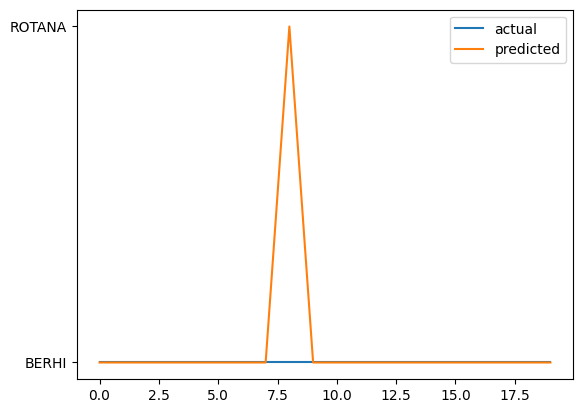

In [46]:
#compare the actual and predicted values
plt.plot(y[:20], label='actual')
plt.plot(y_pred[:20], label='predicted')
plt.legend()
plt.show()

compare train and test set

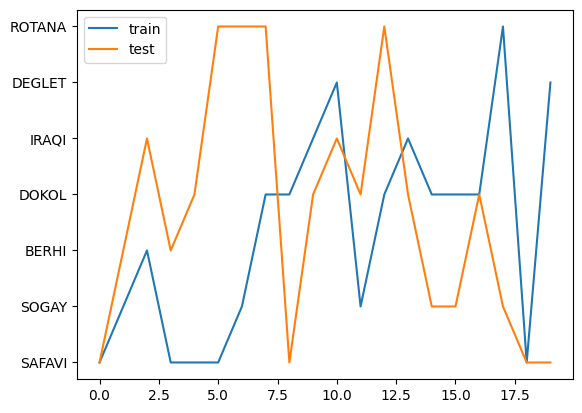

In [47]:

plt.plot(y_train[:20], label='train')
plt.plot(y_test[:20], label='test')
plt.legend()
plt.show()

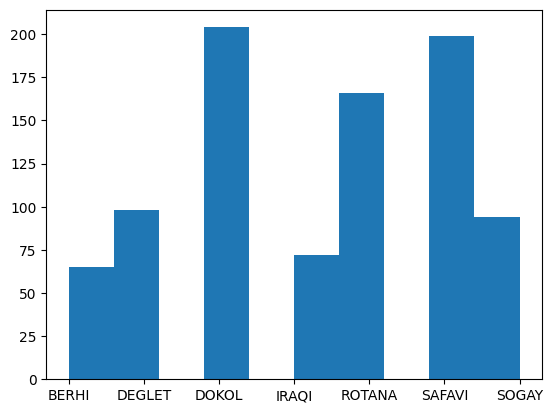

In [48]:
#plot histogram of the dataset
plt.hist(y)
plt.show()